In [47]:
import imageio
from skimage import io
import matplotlib.pyplot as plt
from skimage import feature, measure
from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
import pandas as pd

In [7]:
img = io.imread('bacterial_colonies.jpg')
img_gray = io.imread('bacterial_colonies.jpg', as_gray=True)

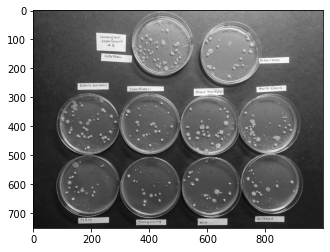

In [12]:
plt.imshow(img_gray, cmap='gray')

In [17]:
canny = feature.canny(img_gray)

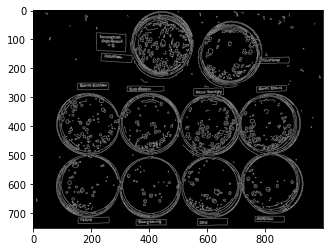

In [18]:
plt.imshow(canny, cmap='gray')

In [19]:
canny

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [26]:
contour= measure.find_contours(img_gray)

In [27]:
label_img = label(img_gray)
regions = regionprops(label_img)

In [43]:
# Find the first object (since we only have one, that's the rectangle!)
r = regions[1]

print('The bounding box is {}'.format(r.bbox))

The bounding box is (154, 358, 155, 359)


In [44]:
props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'major_axis_length',
                                                 'minor_axis_length'))

In [48]:
df = pd.DataFrame(props)

In [49]:
print(df)

    centroid-0  centroid-1  orientation  major_axis_length  minor_axis_length
0        151.0       357.0     0.785398           0.000000                0.0
1        154.0       358.0     0.785398           0.000000                0.0
2        164.0       839.5     1.570796           2.000000                0.0
3        165.0       817.5     1.570796           2.000000                0.0
4        166.0       792.5     1.570796           2.000000                0.0
..         ...         ...          ...                ...                ...
60       291.0       645.0     1.570796           3.265986                0.0
61       293.0       581.5     1.570796           2.000000                0.0
62       481.0       832.0     0.785398           0.000000                0.0
63       482.0       829.0     0.785398           0.000000                0.0
64       483.0       821.0     1.570796           3.265986                0.0

[65 rows x 5 columns]
